# TWITTER USER GENDER CLASSIFICATION

## IMPORT INITIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import matplotlib
%matplotlib inline  

## Importing natural language tool kit. 

In [2]:
import re
import nltk # natural language tool kit
nltk.download("wordnet")      # Download it to corpus file
from nltk.corpus import stopwords  # And import it from corpus file 
#from nltk.corpus import stopwords  # And import it from corpus file 

import nltk as nlp
lemma = nlp.WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package wordnet to /Users/fjacobo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# UPLOAD THE DATA

In [3]:
df = pd.read_csv('twitter.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


#### Data has 26 columns and 20,050 rows
    

In [4]:
df.shape

(20050, 26)

#### Getting info from data Data Type and Null count

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

#### Statistical Results of Data set

In [6]:
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


#### Looking at gender column value counts

In [7]:
df.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

#### There are Female, Male, Brand and Unknown values in the gender column
#### We will try to predict only if user is Female or Male
#### Now we will drop Brand and Unknown from gender column

In [8]:
df = df[(df.gender != 'brand') & (df.gender != 'unknown')]

In [9]:
df.gender.value_counts()

female    6700
male      6194
Name: gender, dtype: int64

#### Now data set has 12,991 rows and 26 columns instead of 20,050 rows and 26 columns

In [10]:
df.shape

(12991, 26)

#### Checking every columns to see if it is suppose to be numerical True and not numerical is false

In [11]:
df.applymap(np.isreal)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,True,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,False
1,True,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,True,False
2,True,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,False
3,True,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,False
4,True,True,False,True,False,False,True,False,True,False,...,False,True,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,True,True,False,True,True,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,True
20046,True,True,False,True,True,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,True
20047,True,True,False,True,True,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,True
20048,True,True,False,True,True,False,True,False,True,False,...,False,True,False,False,True,True,False,True,False,True


#### Checking Corrolation

In [12]:
df.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.211045,0.210778,-0.002220,0.018115,0.008866,0.008360,0.000381,0.852722
_golden,0.211045,1.000000,0.998888,0.010638,0.006473,0.007258,-0.001374,-0.012693,-0.004631
_trusted_judgments,0.210778,0.998888,1.000000,0.010779,0.006472,0.007290,-0.001412,-0.012696,-0.004502
gender:confidence,-0.002220,0.010638,0.010779,1.000000,0.391203,-0.040713,-0.001089,-0.059297,-0.001976
profile_yn:confidence,0.018115,0.006473,0.006472,0.391203,1.000000,-0.002178,0.000449,-0.038765,0.018934
fav_number,0.008866,0.007258,0.007290,-0.040713,-0.002178,1.000000,0.019424,0.177899,0.010473
retweet_count,0.008360,-0.001374,-0.001412,-0.001089,0.000449,0.019424,1.000000,0.004109,-0.004503
tweet_count,0.000381,-0.012693,-0.012696,-0.059297,-0.038765,0.177899,0.004109,1.000000,0.005103
tweet_id,0.852722,-0.004631,-0.004502,-0.001976,0.018934,0.010473,-0.004503,0.005103,1.000000


#### Visualization of Corrlation

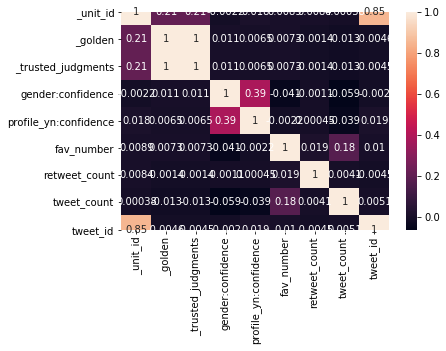

In [13]:
# We use seaborn to visualize
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix, annot=True)

## There is no significant corrolation between numerical data columns
## We decided to use catogorical data to predict gender and used Description column.


#### Using Concat to create gender and description columns to a new data

In [14]:
df = pd.concat([df.gender,df.description],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12991 entries, 0 to 20049
Data columns (total 2 columns):
gender         12894 non-null object
description    11276 non-null object
dtypes: object(2)
memory usage: 304.5+ KB
None


#### Drop null values from new data set. And display new data set using .head() and .info()

In [15]:
df.dropna(axis = 0,inplace = True)
df.gender = [1 if each == "female" else 0 for each in df.gender]
print(df.head())
print(df.info())

   gender                                        description
0       0                              i sing my own rhythm.
1       0  I'm the author of novels filled with family dr...
2       0                louis whining and squealing and all
3       0  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4       1  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 20049
Data columns (total 2 columns):
gender         11194 non-null int64
description    11194 non-null object
dtypes: int64(1), object(1)
memory usage: 262.4+ KB
None


#### Cleaning description data and create new list

We used this code from kaggle but instead splitting words we used tokenizing
Here is the link 
https://www.kaggle.com/evilport/classify-gender-with-description-and-text

In [16]:
description_list = []
for description in df.description:
    # regular expression RE for example "[^a-zA-Z]"
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # convert capital letters to lowercase letters
    # Instead of splitting description
    # we used tokenizer 
    # if we use split for example words like "shouldn't " can not be split like "should" ve "not" but we can by using word_tokenize() 
    description = nltk.word_tokenize(description)
    # stopwords (irrelavent words) 
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    # lemmatazation loved => love   gone = > go
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description] #[ ps.stem(word) for word in description]
    description = " ".join(description)  # for vector we need string not list 
    description_list.append(description)
description_list[0:5]

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx']

In [17]:
description_list[0:20]

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'senior xi xii mmxiv',
 'im p bo burnham disney world',
 'jmkm',
 'enthusiastic f fan model collector music fan film fanatic also aspergian',
 'artisan specializing paper mache print making fibre art art teacher cat devotee find page fb http co g bstg icv',
 'bled died take away sin',
 'union j xxxx',
 'start',
 'bsc economics graduate coys',
 'wife coach mom eight troop follower christ',
 'dm closed sc dear moonshine']

#### Creating bag of words
#### We use CounterVectorizer to create bag of words

we used this code from kaggle to create bag of words
https://www.kaggle.com/bulentsiyah/nlp-basics-nltk-skipgram-cbow-reg-exp-stemmer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer # This is the method we use to create bag of words
max_features = 5000 # Most used 5,000 words

count_vectorizer = CountVectorizer(max_features=max_features, stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  
print("Some of most used {} words: {}".format(max_features,count_vectorizer.get_feature_names()[0:100]))
#stop words- misses some important information that could be useful "him", acc- capturing segments of words 

y = df.iloc[:,0].values   # male or female classes
x = sparce_matrix

Some of most used 5000 words: ['aa', 'aaron', 'ab', 'abc', 'aberdeen', 'able', 'absolute', 'absolutely', 'absurdity', 'abt', 'abuse', 'ac', 'academic', 'academy', 'acc', 'accept', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accomplish', 'account', 'accountant', 'accounting', 'acct', 'ace', 'achieve', 'achieved', 'achievement', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'adjunct', 'admin', 'administration', 'administrator', 'admirer', 'admiro', 'adopted', 'adoption', 'adore', 'adoro', 'adult', 'advance', 'advanced', 'adventure', 'adventurer', 'adventurous', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advocate', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'aficionado', 'afraid', 'africa', 'african', 'africana', 'afrikaans', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', 'agency', 'agender', 'agent', 'agil

#### Visualize number of digits classes

Text(0.5, 1.0, 'male or female classes')

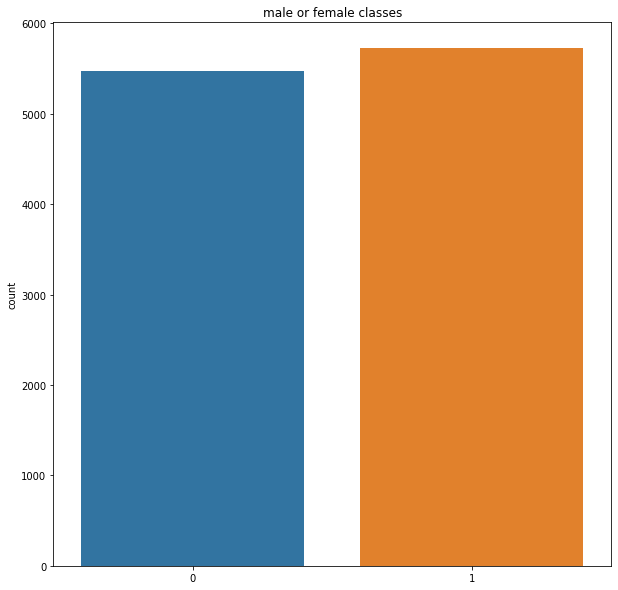

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(y)
plt.title("male or female classes")

# 1) LOGISTIC REGRESSION

# SPLIT DATA TRAIN AND TEST

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Take a look at the shape of each of these

In [21]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8955, 5000) (8955,) (2239, 5000) (2239,)


# TRAIN THE DATA

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

/Users/fjacobo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# PREDICT Y AND TEST

In [23]:
y_pred = logistic_reg.predict(x_test)

#### Accuracy of our logistic model

In [24]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y,logistic_reg.predict(x)))

Accuracy 0.8069501518670716


In [25]:
pred_test = logistic_reg.predict(x_test)
pred_test

array([1, 0, 0, ..., 1, 0, 1])

#### Compare actual values vs predicted values
#### Created new data set df1

In [26]:
df1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df1.head(20)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,1
8,0,1
9,0,1


### Bar chart to easily see actual vs predicted

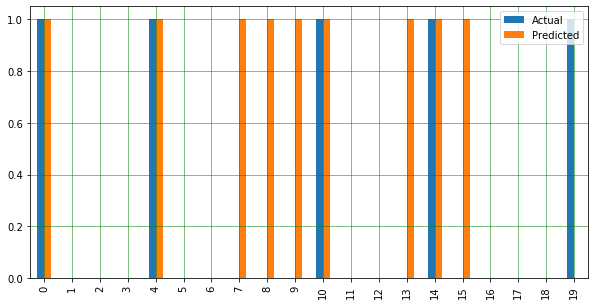

In [27]:
df2=df1.head(20)
df2.plot(kind='bar',figsize=(10,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='green')
plt.show()

#### To look at prediction results data side by side

In [28]:
results = pd.DataFrame(data=logistic_reg.predict_proba(x_test))
results['pred']=logistic_reg.predict(x_test)
results['true']=y_test.tolist()
results.head(15)

,0,1,pred,true
0,0.351530,0.648470,1,1
1,0.582965,0.417035,0,0
2,0.928717,0.071283,0,0
3,0.991689,0.008311,0,0
4,0.404975,0.595025,1,1
5,0.941159,0.058841,0,0
6,0.523036,0.476964,0,0
7,0.171395,0.828605,1,0
8,0.288283,0.711717,1,0
9,0.379956,0.620044,1,0


#### New data set that we created to compare actual and predicted 
#### Checking shape of df1
#### It has 2239 predicted values 

In [29]:
df1.shape

(2239, 2)

#### Create for loop to check how many wrong predicted rows
#### Out of 2239 only 741 rows are not matching

In [30]:
j=0
for i in range(len(df1)):
    if df1.iloc[i,0]!=df1.iloc[i,1]:
        j=j+1
print(j)

741


### Train and Test score of the logistic model
### Training accuracy is high but test accuracy is low

In [31]:
train_score = logistic_reg.score(x_train, y_train)
print('Training accuracy is ', train_score)
test_score=logistic_reg.score(x_test, y_test)
print('Test accuracy is ', test_score)

Training accuracy is  0.84142936906756
Test accuracy is  0.6690486824475212


#### Print coefficients and intercepts

In [32]:
print('Y intercept', logistic_reg.intercept_)
print('coefficent b1', logistic_reg.coef_)

Y intercept [0.35430258]
coefficent b1 [[ 0.52537458  0.3180891   0.6184881  ... -0.27229968  0.26702823
   0.00326326]]


#### Probability and Prediction

In [33]:
prob = logistic_reg.predict_proba(x_test)
pred = logistic_reg.predict(x_test)
print(prob)
print(pred)

[[0.35153028 0.64846972]
 [0.5829653  0.4170347 ]
 [0.92871695 0.07128305]
 ...
 [0.42561047 0.57438953]
 [0.65712348 0.34287652]
 [0.14751269 0.85248731]]
[1 0 0 ... 1 0 1]


#### Creating bar plot for prediction

(array([671.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 436.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

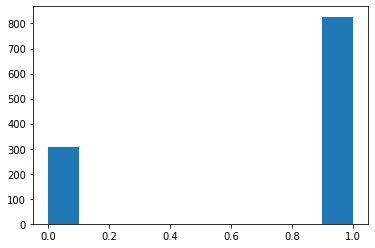

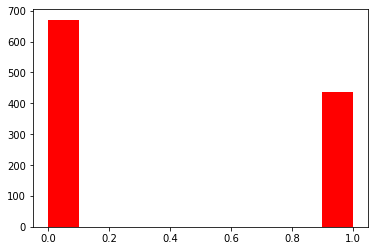

In [34]:
plt.hist(pred[y_test==1])
plt.figure()
plt.hist(pred[y_test==0], color='r')

#### Confusion matrix of the y test and y pred

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


#### Visualize confusin matrix

I found this code on Kaggle it makes clear confusion matrix results
They used for on  Heart Disease UCI data
https://www.kaggle.com/canbugra/machine-learning-ml-dataiteam/data

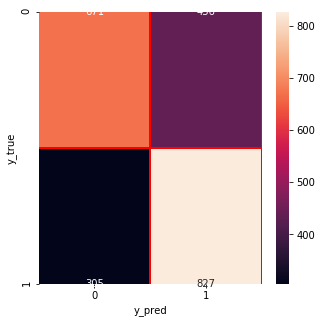

In [36]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Let's make another plot to understand 

Text(0.5, 0, 'predictions probabilities')

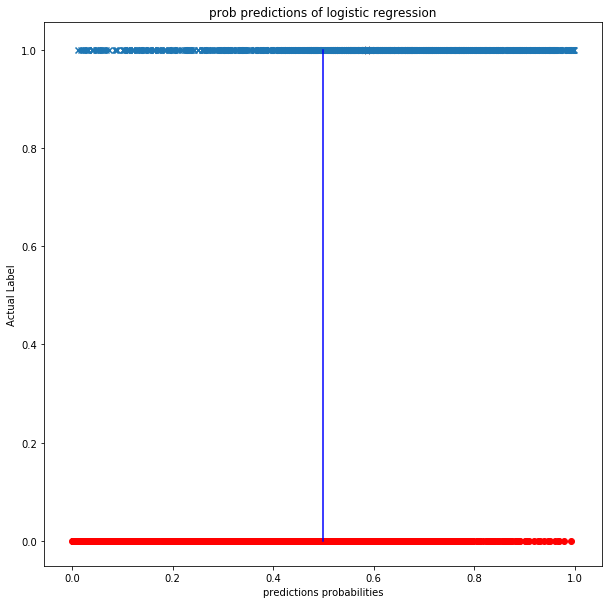

In [37]:
prob_test = logistic_reg.predict_proba(x_test)  # Guess what is this

plt.figure(figsize=(10,10))
plt.scatter( prob_test[y_test==1,1],y_test[y_test==1], marker = 'x')
plt.scatter( prob_test[y_test==0,1],y_test[y_test==0], c='r', marker = 'o')
plt.plot([0.5,0.5],[0,1],c='b')
plt.title('prob predictions of logistic regression')
plt.ylabel('Actual Label')
plt.xlabel('predictions probabilities')

### R2 Score

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 score', r2_score(y_test,y_pred))

R2 score -0.3239703333429096


### Mean absulate error
### Mean Squared Error
### Root mean squared error

In [39]:
# Also mean absulate error and mean square error
print('Mean absulate error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absulate error: 0.3309513175524788
Mean Squared Error: 0.3309513175524788
Root mean squared error: 0.5752836844135933


# 2) DEEP NEURAL NETWORK

# Step 1) Build the model ( Defining the model/flow )

In [40]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import models, layers

# Decribe first hidden layer
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_dim=x_train.shape[1]))

# 2nd layer
# Relu gives you more accuracy and faster
model.add(layers.Dense(50, activation='relu'))

# 3rd layer
model.add(layers.Dense(16, activation='relu'))

# 4th layer
model.add(layers.Dense(10, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))


## Step 2)  lost(cost funchtion), optimizer, metric(To decide if we learning or not)


In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Step 3) Fit the model

### Epochs is number of iters
### Loss is reducing 
### Accuracy is rising
### Batch size controlling how many samples you're learning at once. We picked 10
### loss: 0.0668 - accuracy: 0.9615 - val_loss: 4.8648 - val_accuracy: 0.6440

In [56]:
history = model.fit(x_train,y_train, epochs=200,batch_size=10, validation_data=(x_test, y_test))

Epoch 1/200
896/896 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9615 - val_loss: 6.1268 - val_accuracy: 0.6387
Epoch 2/200
896/896 [==============================] - 4s 4ms/step - loss: 0.0667 - accuracy: 0.9610 - val_loss: 6.6829 - val_accuracy: 0.6373
Epoch 3/200
896/896 [==============================] - 4s 4ms/step - loss: 0.0670 - accuracy: 0.9610 - val_loss: 5.6904 - val_accuracy: 0.6356
Epoch 4/200
896/896 [==============================] - 4s 4ms/step - loss: 0.0670 - accuracy: 0.9611 - val_loss: 5.7928 - val_accuracy: 0.6378
Epoch 5/200
896/896 [==============================] - 4s 4ms/step - loss: 0.0693 - accuracy: 0.9607 - val_loss: 4.8576 - val_accuracy: 0.6418
Epoch 6/200
896/896 [==============================] - 3s 4ms/step - loss: 0.0731 - accuracy: 0.9601 - val_loss: 3.9120 - val_accuracy: 0.6436
Epoch 7/200
896/896 [==============================] - 3s 4ms/step - loss: 0.0679 - accuracy: 0.9607 - val_loss: 4.4315 - val_accuracy: 0.6387

# We would like to change hidden layers, neurons, learning rate, loss and output layer as softmax
# To see if we get different results
# 3) New DNN

# Step 1) Build the model

In [57]:
from tensorflow.keras import regularizers # To change learning rate import regularizers

new_model = tf.keras.models.Sequential()


new_model.add(layers.Dense(800, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_dim=x_train.shape[1]))


new_model.add(layers.Dense(700, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


new_model.add(layers.Dense(750, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


new_model.add(layers.Dense(750, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


new_model.add(layers.Dense(400, kernel_regularizer=regularizers.l2(0.001), activation='relu'))


new_model.add(layers.Dense(100, kernel_regularizer=regularizers.l2(0.001),  activation='relu'))


new_model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='softmax'))



In [44]:
new_model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

## Step 3) Fit the model

In [45]:
new_history = new_model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=150, batch_size=100)

Epoch 1/150
90/90 [==============================] - 4s 45ms/step - loss: 3.8169 - accuracy: 0.4768 - val_loss: 3.0364 - val_accuracy: 0.5060
Epoch 2/150
90/90 [==============================] - 4s 43ms/step - loss: 2.7223 - accuracy: 0.5895 - val_loss: 2.4324 - val_accuracy: 0.6373
Epoch 3/150
90/90 [==============================] - 4s 44ms/step - loss: 2.1151 - accuracy: 0.7500 - val_loss: 2.0820 - val_accuracy: 0.6606
Epoch 4/150
90/90 [==============================] - 4s 44ms/step - loss: 1.6549 - accuracy: 0.8440 - val_loss: 1.9537 - val_accuracy: 0.6632
Epoch 5/150
90/90 [==============================] - 4s 44ms/step - loss: 1.3369 - accuracy: 0.8994 - val_loss: 1.9778 - val_accuracy: 0.6539
Epoch 6/150
90/90 [==============================] - 4s 45ms/step - loss: 1.1195 - accuracy: 0.9283 - val_loss: 2.0415 - val_accuracy: 0.6454
Epoch 7/150
90/90 [==============================] - 4s 44ms/step - loss: 0.9684 - accuracy: 0.9436 - val_loss: 2.0132 - val_accuracy: 0.6543
Epoch 

### New DNN Model got slower and lost was high at the begining then started reducing
### Validation loss was smaller than first DNN and Validation accuracy was same




## Compare Results

### 1ST DNN RESULTS
### loss: 0.0668 - accuracy: 0.9615 - val_loss: 4.8648 - val_accuracy: 0.6440

### 2ND DNN RESULTS
### loss: 0.1188 - accuracy: 0.9551 - val_loss: 1.3398 - val_accuracy: 0.6414

## New model has higher loss and lower accuracy

# 4) DECISION TREE

### Data is already splited

### Train the data with single desicion tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction and Evaluation 

In [47]:
predictions = dtree.predict(x_test)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [48]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1107
           1       0.63      0.67      0.65      1132

    accuracy                           0.64      2239
   macro avg       0.64      0.64      0.64      2239
weighted avg       0.64      0.64      0.64      2239

[[666 441]
 [371 761]]


# 5) Random Forests
### Now we compare desicion tree to random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array([1, 0, 0, ..., 1, 1, 1])

In [51]:
rfc.predict_proba(x_test)

array([[0.24995267, 0.75004733],
       [0.77230287, 0.22769713],
       [0.72449469, 0.27550531],
       ...,
       [0.05      , 0.95      ],
       [0.47076726, 0.52923274],
       [0.06      , 0.94      ]])

In [52]:
print(confusion_matrix(y_test,rfc_pred))

[[703 404]
 [346 786]]


## Visualize confusion matrix

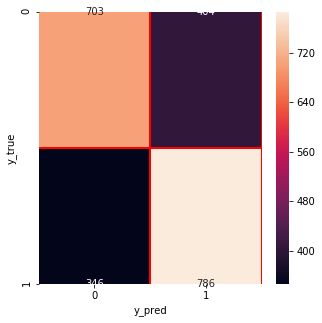

In [53]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [54]:
rfc.predict_proba(x_test)

array([[0.24995267, 0.75004733],
       [0.77230287, 0.22769713],
       [0.72449469, 0.27550531],
       ...,
       [0.05      , 0.95      ],
       [0.47076726, 0.52923274],
       [0.06      , 0.94      ]])

In [55]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1107
           1       0.66      0.69      0.68      1132

    accuracy                           0.67      2239
   macro avg       0.67      0.66      0.66      2239
weighted avg       0.67      0.67      0.66      2239



# Conclusion: 
### - This report aimed to analyze different algorithms and meta-attributes for the gender classification problem on Twitter.
### - The main advantage of our gender-classification methods is that they achieve good accuracy  of 80% results.
### - In the future, we intend to apply additional profile and tweet characteristics, such as the content of tweets, for gender classification. 
### - We also plan to investigate combinations of characteristics in order to improve our prediction accuracy even  further.